In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cleaning & Integrating Labour Cost Data

In [3]:
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.head(10)


,quarter,level_1,level_2,level_3,value
0,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Manufacturing,88.4
1,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Construction,55.0
2,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Utilities,71.9
3,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Other Goods Industries,33.8
4,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Wholesale & Retail Trade,73.9
5,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Transportation & Storage,62.4
6,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,19.3
7,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,98.8
8,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,44.3
9,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,27.7


In [4]:
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


<AxesSubplot:xlabel='quarter'>

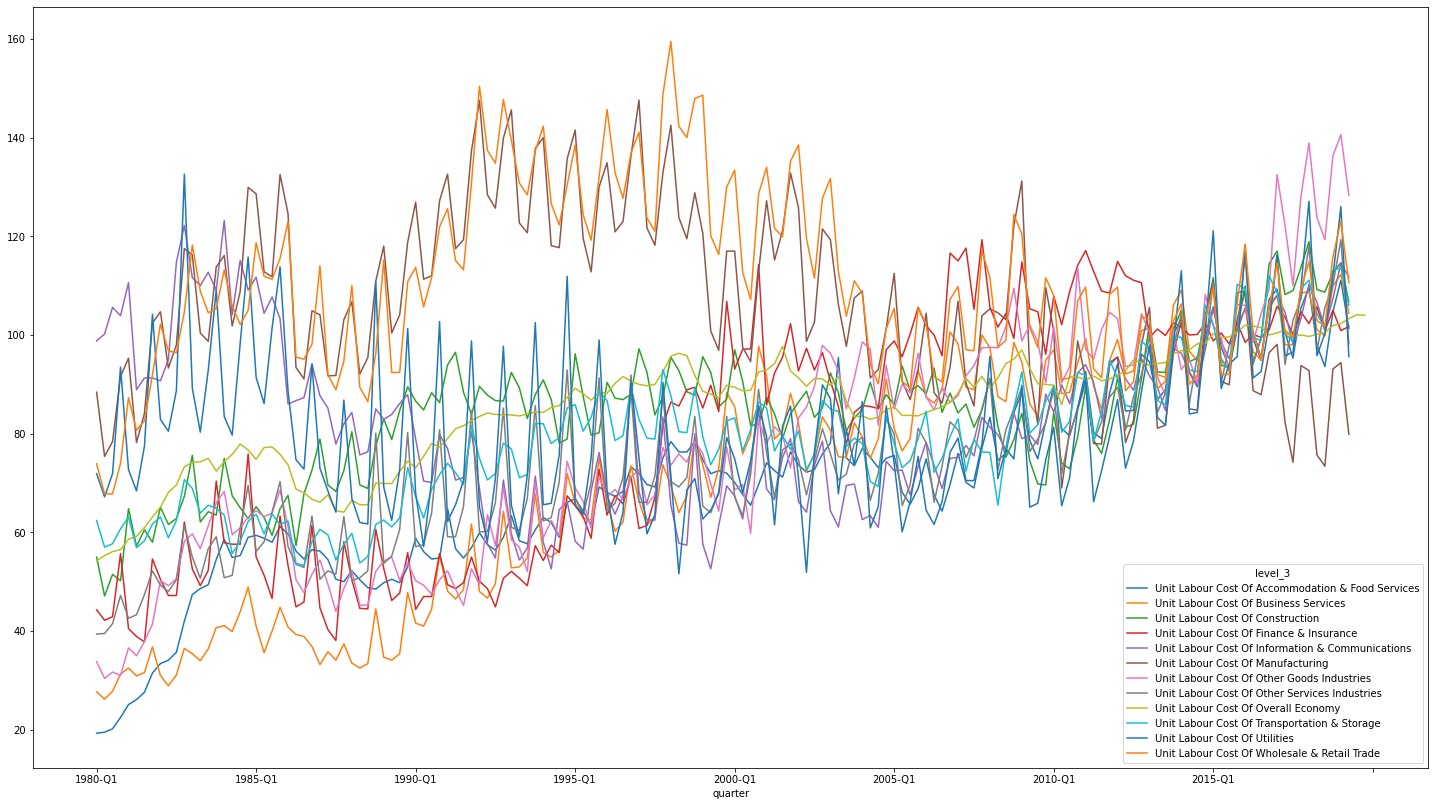

In [5]:
combined_lc.pivot(index="quarter", columns=sector, values="value").plot(figsize=(25,14))

In [6]:
## Cleaning Fertility Rates

In [7]:
df = pd.read_csv("./births-and-fertility-annual-1960-2018/total-fertility-rate-and-reproduction-rate.csv")
df.head(10)
## validation data set

,year,level_1,value
0,1960,Total Fertility Rate,5.76
1,1960,Gross Reproduction Rate,2.78
2,1960,Net Reproduction Rate,2.54
3,1961,Total Fertility Rate,5.41
4,1961,Gross Reproduction Rate,2.63
5,1961,Net Reproduction Rate,2.41
6,1962,Total Fertility Rate,5.21
7,1962,Gross Reproduction Rate,2.53
8,1962,Net Reproduction Rate,2.31
9,1963,Total Fertility Rate,5.16


In [8]:
ts = pd.read_csv('birth-death/live-birth.csv', thousands=",").T
ts.head(10)
#ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.iloc[0][0] = "Total Live-Births"
#pd.PeriodIndex(ts["Data Series"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2'), freq='Q').to_timestamp()
#df.index.names = ['quarter']
#ts.reset_index(level=0, inplace=True)
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')

/tmp/ipykernel_29158/3206424000.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [32]:
test =pd.merge(ts, df_lc, on='quarter', how='inner')
test['time'] = pd.PeriodIndex(test['quarter'], freq='Q').to_timestamp() # convert quarterly data into time
test = test.dropna()
raw = test.reset_index(drop=True)
#raw = raw.reindex(index=raw.index[::-1])
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,2019-Q2,9487,4384,3387,1175,336,124,81,101.3,104.4,...,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6,2019-04-01
1,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01
2,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
3,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
4,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
130,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
131,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
132,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01


In [57]:
#raw.sort_values(by="time")
#raw.to_csv("./birth_labour", sep='\t', encoding='utf-8')
raw = raw[::-1].reset_index(drop = True)
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,1986-01-01
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
130,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
131,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
132,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01


In [11]:
#raw = pd.read_csv("./birth_labour", sep='\t', encoding='utf-8')
#raw['time'] = pd.PeriodIndex(raw['quarter'], freq='Q').to_timestamp()
#ts.tail(10)

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
132,1988-Q2,12068,4426,4645,2265,485,107,51
133,1988-Q1,11127,4374,4032,2002,434,117,41
134,1987-Q4,12843,4928,4966,2195,425,117,72
135,1987-Q3,11724,4532,4492,1940,458,126,68
136,1987-Q2,10488,4306,3942,1623,395,82,51
137,1987-Q1,8834,4007,3053,1234,320,81,56
138,1986-Q4,10239,4782,3423,1454,351,98,51
139,1986-Q3,9854,4398,3475,1395,359,98,44
140,1986-Q2,9353,4186,3367,1271,332,87,50
141,1986-Q1,9954,4414,3553,1433,316,103,61


In [58]:
raw.head()

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,1986-01-01
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01


In [59]:
from datetime import datetime
#test.set_index('time') set index as time
target = list(raw)[1]
cols = list(raw)[2:20]
timelist = list(raw['time'])
#timelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in timelist]
print('Training set shape:{}'.format(test.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(134, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['  1st Live-Birth', '  2nd Live-Birth', '  3rd Live-Birth', '  4th Live-Birth', '  5th Live-Birth', '  6th Live-Birth & Over', 'Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities', 'Unit Labour Cost Of Wholesale & Retail Trade']


In [60]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
train_length = int(0.8*len(raw))
depth = 4
batch_size = 32
prediction_horizon = 1

train = raw.iloc[:train_length, :]
valid = raw.iloc[train_length:, :]

#X = np.zeros((len(raw), depth, len(cols)))
#for i, name in enumerate(cols):
#    for j in range(depth):
#        X[:, j, i] = raw[name].shift(depth - j - 1).bfill()
#y = raw[target].shift(-1).ffill().values
X = np.zeros((len(train), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        X[:, j, i] = train[name].shift(depth - j - 1).bfill()
Y = train[target].shift(-1).ffill().values

x = np.zeros((len(valid), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        x[:, j, i] = valid[name].shift(depth - j - 1).bfill()
y = valid[target].shift(-1).ffill().values

In [61]:
def relative(data):
    return torch.Tensor((data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0)+ 1e-9)), data.max(axis=0), data.min(axis=0)

X_train, X_train_max , X_train_min = relative(X)
X_test, X_test_max , X_test_min = relative(x)

y_train, y_train_max , y_train_min = relative(Y)
y_test, y_test_max , y_test_min = relative(y)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)


In [62]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm
class TCNTemporalBlock(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size, dilation):
        super().__init__()
        padding = int(dilation*(kernel_size-1))
        self.pad = nn.ConstantPad1d((padding, 0), 0)
        self.conv1 = weight_norm(nn.Conv1d(input_channels, output_channels, kernel_size, dilation=dilation))
        self.conv2 = weight_norm(nn.Conv1d(output_channels, output_channels, kernel_size, dilation=dilation))
        self.residual = nn.Conv1d(input_channels, output_channels, 1)
        
    def forward(self, x):
        out = self.pad(x)
        out = torch.relu(self.conv1(out))
        out = self.pad(out)
        out = torch.relu(self.conv2(out))
        y = self.residual(x)
        out = torch.relu(out + y)
        return out
    

class TCN(nn.Module):
    def __init__(self, input_dim, n_layers, n_channels=32, kernel_size=3):
        super().__init__()
        self.first_layer = TCNTemporalBlock(input_dim, n_channels, kernel_size, 1)
        self.tcn_layers = nn.ModuleList([TCNTemporalBlock(n_channels, n_channels, kernel_size, 2**(i+1)) for i in range(n_layers-1)])
        self.n_layers = n_layers
        self.output_transform = nn.Linear(n_channels, 1)
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.first_layer(x)
        for i in range(self.n_layers-1):
            x = self.tcn_layers[i](x)
        x = x[..., -1]
        out = self.output_transform(x)
        return out.squeeze(1)

mse:  4000647.8 mae:  1510.9495


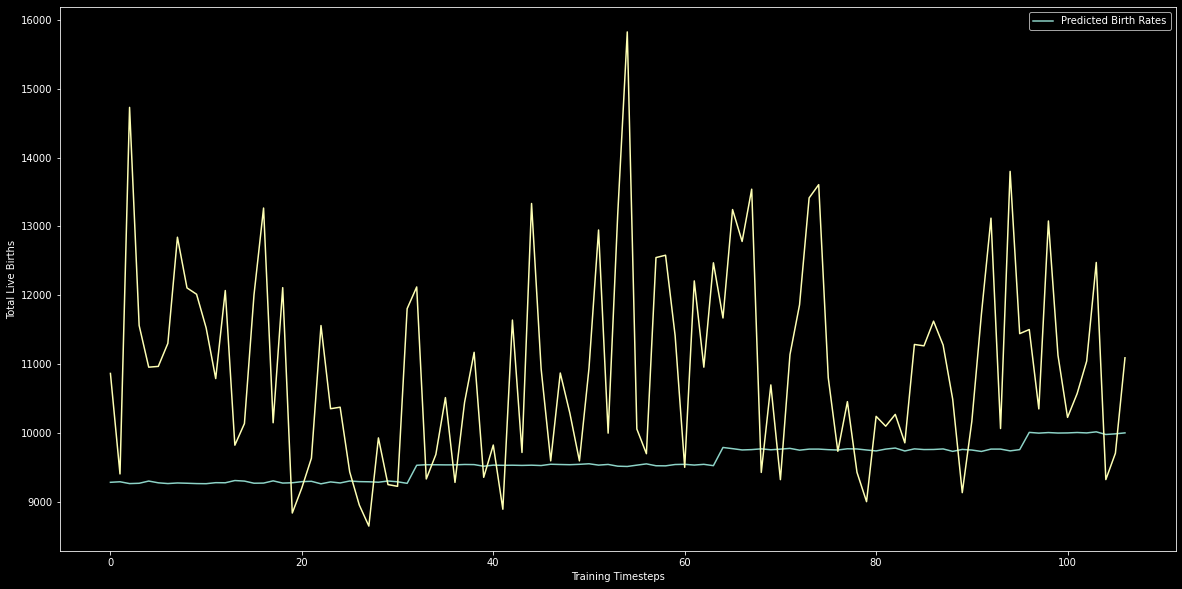

Iter:  0 train_loss:  0.28507351875305176 val_loss:  0.10533878952264786
Iter:  1 train_loss:  0.17227280139923096 val_loss:  0.08071740716695786
Iter:  2 train_loss:  0.17736176028847694 val_loss:  0.07852894067764282
Iter:  3 train_loss:  0.14507989771664143 val_loss:  0.08053546398878098
Iter:  4 train_loss:  0.14560423232614994 val_loss:  0.08326826989650726
Iter:  5 train_loss:  0.14938804134726524 val_loss:  0.08025398850440979
Iter:  6 train_loss:  0.1259526927024126 val_loss:  0.07585011422634125
Iter:  7 train_loss:  0.1287431251257658 val_loss:  0.07299862056970596
Iter:  8 train_loss:  0.0921277105808258 val_loss:  0.07014818489551544
Iter:  9 train_loss:  0.07544145919382572 val_loss:  0.06738794595003128
mse:  869446.8 mae:  743.7667


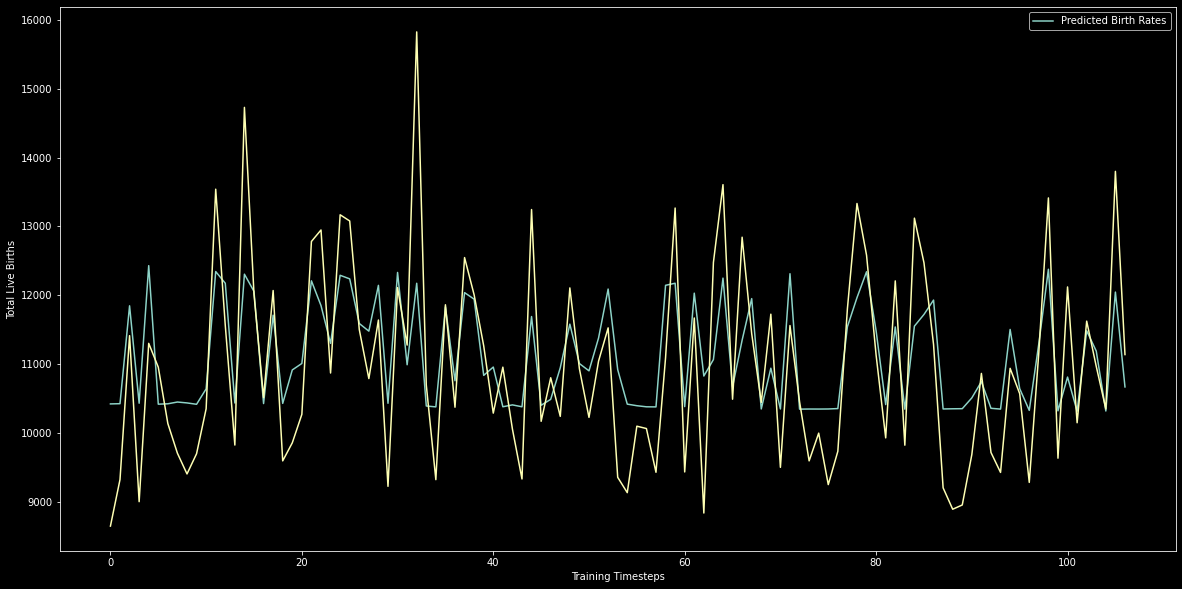

Iter:  10 train_loss:  0.0653346311300993 val_loss:  0.06477826833724976
Iter:  11 train_loss:  0.07172306254506111 val_loss:  0.06443227082490921
Iter:  12 train_loss:  0.061059437692165375 val_loss:  0.07125726342201233
Iter:  13 train_loss:  0.05132153257727623 val_loss:  0.0606994591653347
Iter:  14 train_loss:  0.05246044136583805 val_loss:  0.06117294356226921
Iter:  15 train_loss:  0.04092689557000995 val_loss:  0.06340279430150986
Iter:  16 train_loss:  0.04414110537618399 val_loss:  0.061304718255996704
Iter:  17 train_loss:  0.038474710658192635 val_loss:  0.05946475639939308
Iter:  18 train_loss:  0.0335579477250576 val_loss:  0.06387370079755783
Iter:  19 train_loss:  0.03273520711809397 val_loss:  0.05866006761789322
mse:  399961.4 mae:  504.37158


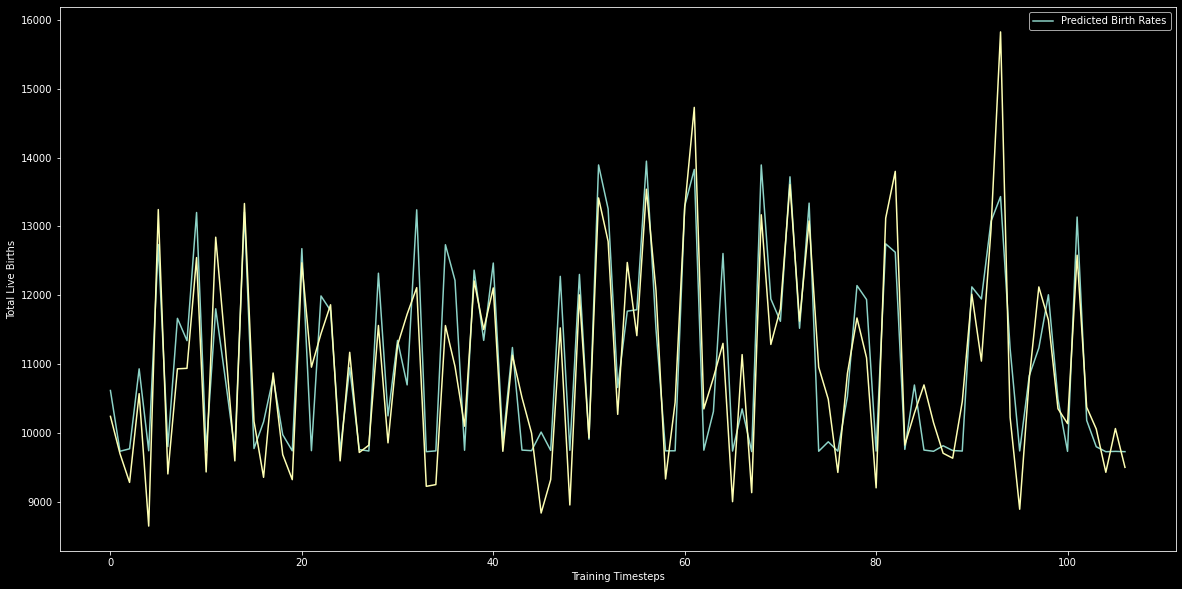

Iter:  20 train_loss:  0.027966279769316316 val_loss:  0.0617673397064209
Iter:  21 train_loss:  0.030927862972021103 val_loss:  0.0569911003112793
Iter:  22 train_loss:  0.029062054585665464 val_loss:  0.06050901114940643
Iter:  23 train_loss:  0.032960239332169294 val_loss:  0.05637354031205177
Iter:  24 train_loss:  0.028671906795352697 val_loss:  0.06116915121674538
Iter:  25 train_loss:  0.027967239497229457 val_loss:  0.05520305037498474
Iter:  26 train_loss:  0.02664952678605914 val_loss:  0.05757332220673561
Iter:  27 train_loss:  0.030319473706185818 val_loss:  0.05625281482934952
Iter:  28 train_loss:  0.025745855178683996 val_loss:  0.05576799437403679
Iter:  29 train_loss:  0.02313246065750718 val_loss:  0.05878210812807083
mse:  332991.1 mae:  460.65237


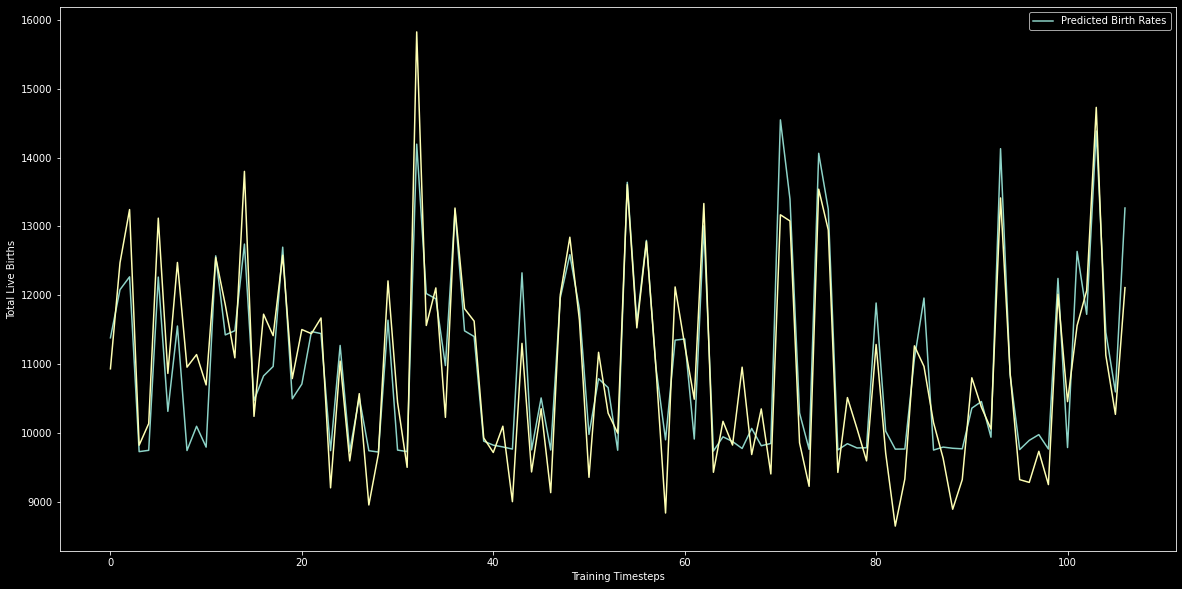

Iter:  30 train_loss:  0.026383028365671635 val_loss:  0.05270961672067642
Iter:  31 train_loss:  0.022772989701479673 val_loss:  0.0586748905479908
Iter:  32 train_loss:  0.021893939469009638 val_loss:  0.05170760676264763
Iter:  33 train_loss:  0.02518771355971694 val_loss:  0.05454045906662941
Iter:  34 train_loss:  0.019923835061490536 val_loss:  0.05195033177733421
Iter:  35 train_loss:  0.022646187338978052 val_loss:  0.05217663571238518
Iter:  36 train_loss:  0.021248978562653065 val_loss:  0.05325104668736458
Iter:  37 train_loss:  0.01723983115516603 val_loss:  0.04975742846727371
Iter:  38 train_loss:  0.019084414467215538 val_loss:  0.05180315673351288
Iter:  39 train_loss:  0.016181874088943005 val_loss:  0.0504167377948761
mse:  218187.75 mae:  368.88016


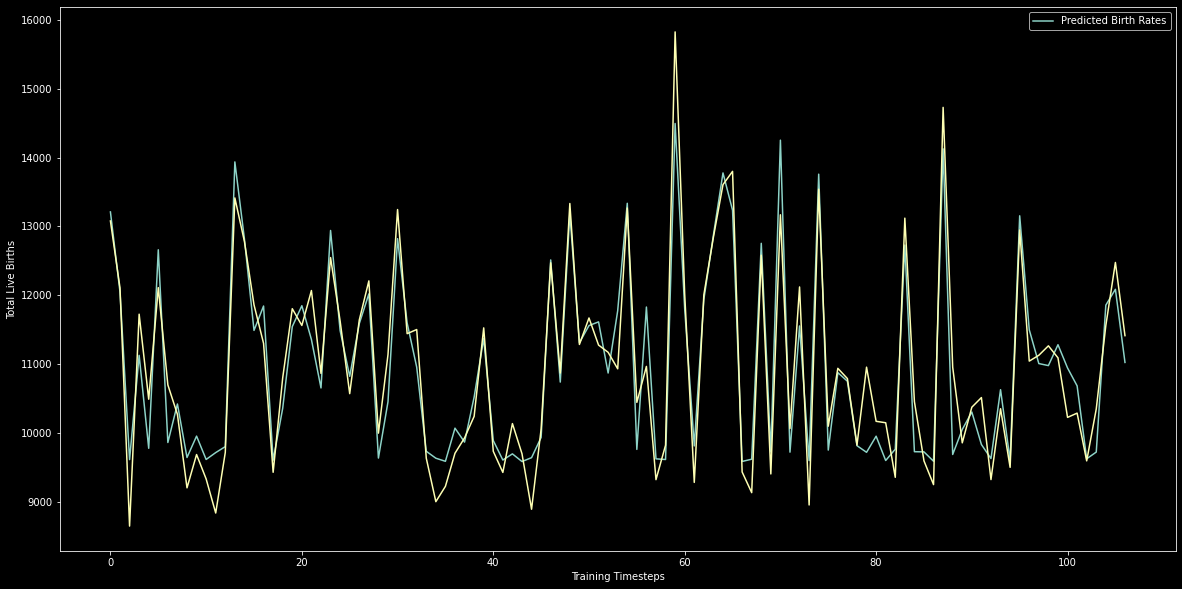

Iter:  40 train_loss:  0.016219710931181908 val_loss:  0.05188669636845589
Iter:  41 train_loss:  0.015491062076762319 val_loss:  0.04918716475367546
Iter:  42 train_loss:  0.015002085594460368 val_loss:  0.05109770968556404
Iter:  43 train_loss:  0.015429554972797632 val_loss:  0.04947333037853241
Iter:  44 train_loss:  0.01533357985317707 val_loss:  0.0492042601108551
Iter:  45 train_loss:  0.014262152137234807 val_loss:  0.04942706227302551
Iter:  46 train_loss:  0.012969440314918756 val_loss:  0.048778463155031204
Iter:  47 train_loss:  0.013930401299148798 val_loss:  0.04827141761779785
Iter:  48 train_loss:  0.013053797651082277 val_loss:  0.048413150012493134
Iter:  49 train_loss:  0.01232634810730815 val_loss:  0.046849172562360764
mse:  148154.11 mae:  304.289


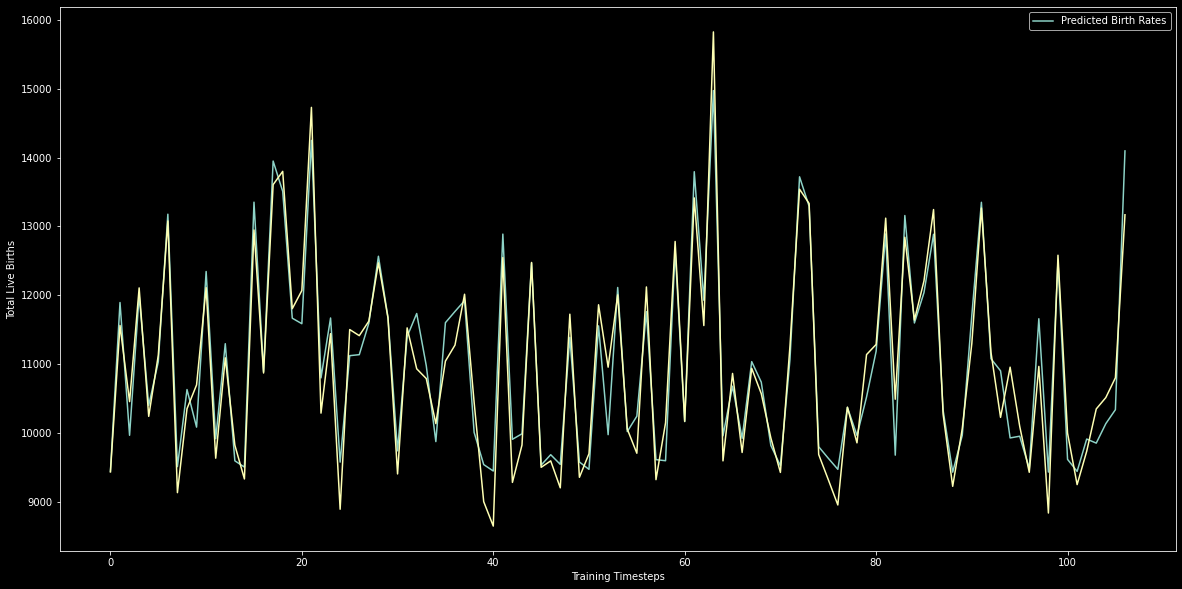

Iter:  50 train_loss:  0.012521218275651336 val_loss:  0.04790247976779938
Iter:  51 train_loss:  0.01125031290575862 val_loss:  0.045642923563718796
Iter:  52 train_loss:  0.010169784654863179 val_loss:  0.04527159407734871
Iter:  53 train_loss:  0.009565826272591949 val_loss:  0.04559541493654251
Iter:  54 train_loss:  0.008833152940496802 val_loss:  0.045047249644994736
Iter:  55 train_loss:  0.008656453806906939 val_loss:  0.04646599665284157
Iter:  56 train_loss:  0.008744017919525504 val_loss:  0.04426024481654167
Iter:  57 train_loss:  0.008205545600503683 val_loss:  0.045834485441446304
Iter:  58 train_loss:  0.007816887809894979 val_loss:  0.04477749019861221
Iter:  59 train_loss:  0.006893025012686849 val_loss:  0.044516511261463165
mse:  92171.914 mae:  238.09848


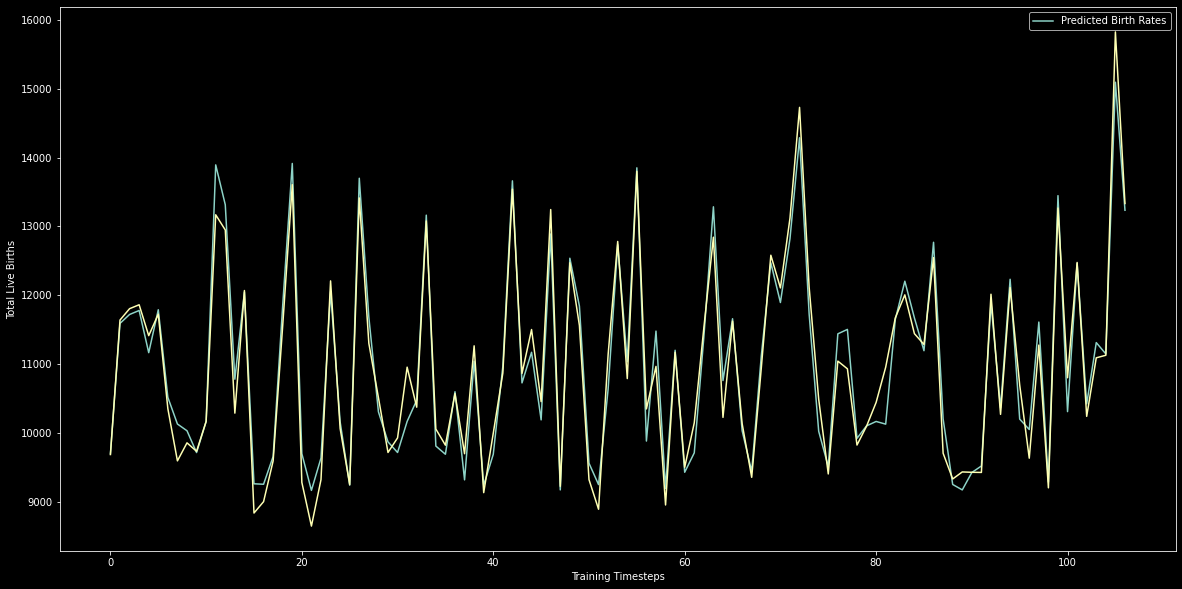

Iter:  60 train_loss:  0.007353233522735536 val_loss:  0.04500333219766617
Iter:  61 train_loss:  0.007227220106869936 val_loss:  0.04468044638633728
Iter:  62 train_loss:  0.006989197107031941 val_loss:  0.046703409403562546
Iter:  63 train_loss:  0.007250095484778285 val_loss:  0.04395710304379463
Iter:  64 train_loss:  0.007294379407539964 val_loss:  0.0471017025411129
Iter:  65 train_loss:  0.006657299119979143 val_loss:  0.043549489229917526
Iter:  66 train_loss:  0.007337591145187616 val_loss:  0.046677377074956894
Iter:  67 train_loss:  0.007945506367832422 val_loss:  0.04466022923588753
Iter:  68 train_loss:  0.005925046629272401 val_loss:  0.044132232666015625
Iter:  69 train_loss:  0.006404747953638434 val_loss:  0.044075366109609604
mse:  79841.94 mae:  221.15381


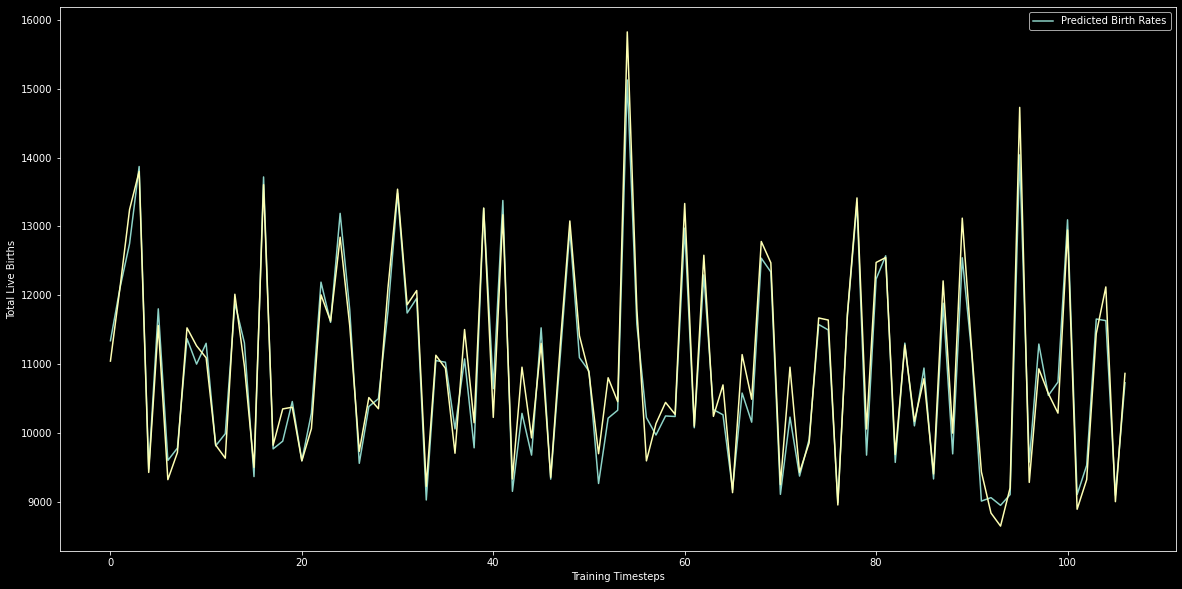

Iter:  70 train_loss:  0.0061498412396758795 val_loss:  0.04303837567567825
Iter:  71 train_loss:  0.005407960037700832 val_loss:  0.04340304806828499
Iter:  72 train_loss:  0.004612009623087943 val_loss:  0.04250793904066086
Iter:  73 train_loss:  0.005246881861239672 val_loss:  0.04341082647442818
Iter:  74 train_loss:  0.0050451504066586494 val_loss:  0.04232411086559296
Iter:  75 train_loss:  0.006403311854228377 val_loss:  0.0452347956597805
Iter:  76 train_loss:  0.005789696471765637 val_loss:  0.04228002205491066
Iter:  77 train_loss:  0.004802234878297895 val_loss:  0.04295960068702698
Iter:  78 train_loss:  0.004610084346495569 val_loss:  0.04189429432153702
Iter:  79 train_loss:  0.004430027736816555 val_loss:  0.04436156526207924
mse:  66261.57 mae:  196.9128


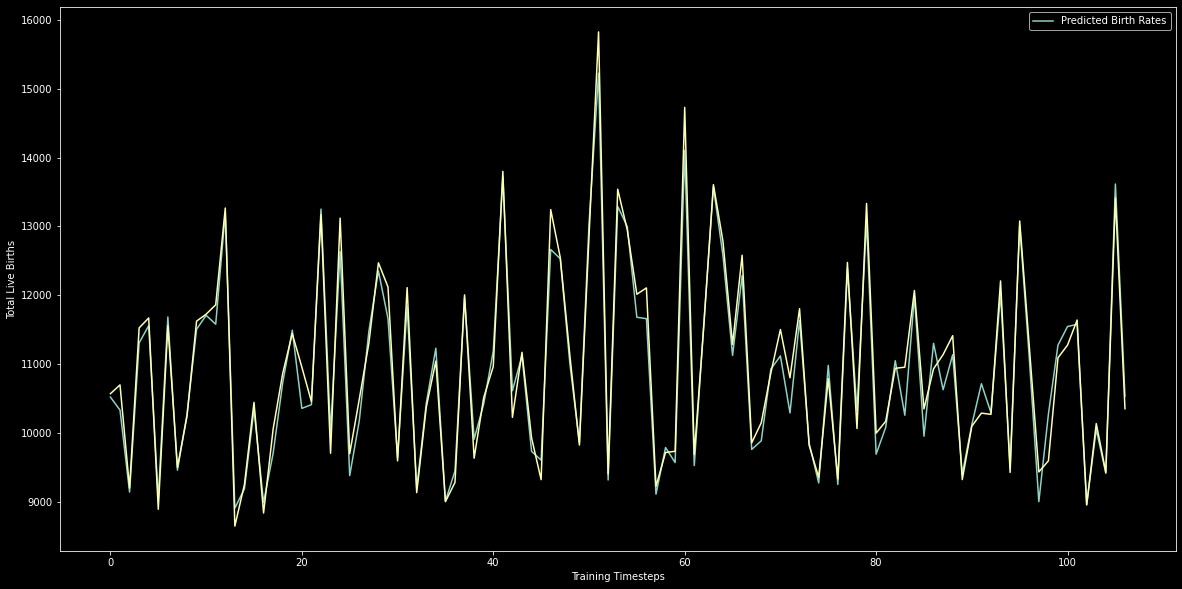

Iter:  80 train_loss:  0.005298872827552259 val_loss:  0.04192493483424187
Iter:  81 train_loss:  0.004813837236724794 val_loss:  0.04426226019859314
Iter:  82 train_loss:  0.004993607115466148 val_loss:  0.04164314642548561
Iter:  83 train_loss:  0.005178446765057743 val_loss:  0.04433872923254967
Iter:  84 train_loss:  0.005010046414099634 val_loss:  0.0418030321598053
Iter:  85 train_loss:  0.0042886436567641795 val_loss:  0.04383111745119095
Iter:  86 train_loss:  0.0037517286255024374 val_loss:  0.04285386949777603
Iter:  87 train_loss:  0.003927281766664237 val_loss:  0.04309254139661789
Iter:  88 train_loss:  0.0037981622153893113 val_loss:  0.042133014649152756
Iter:  89 train_loss:  0.003747770795598626 val_loss:  0.042574990540742874
mse:  47986.598 mae:  170.0759


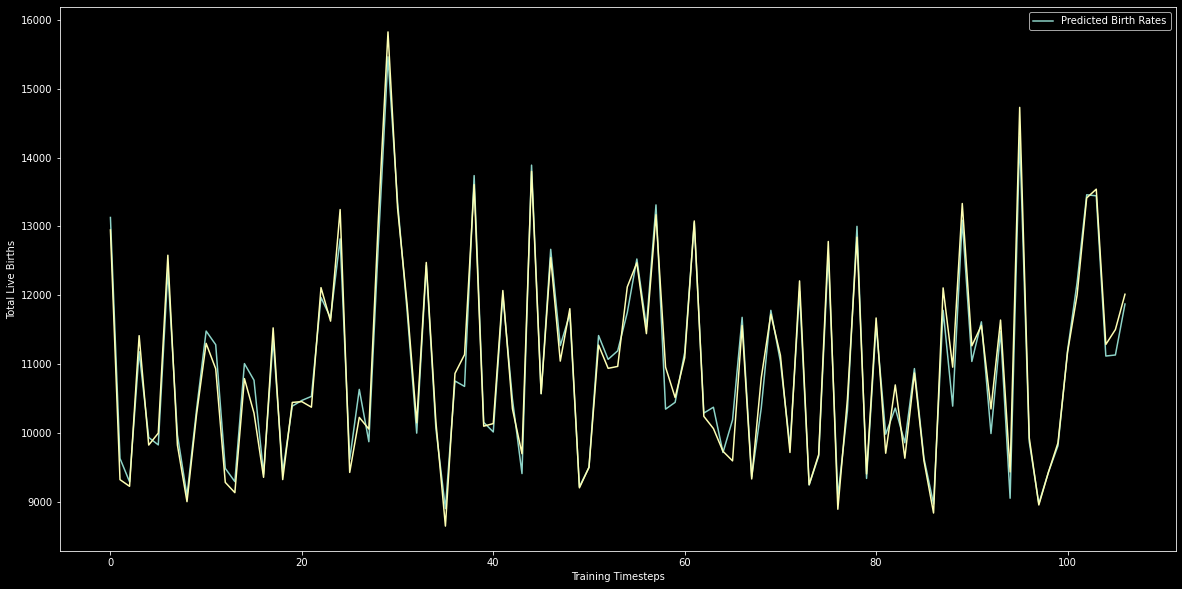

Iter:  90 train_loss:  0.0033817853836808354 val_loss:  0.04219532012939453
Iter:  91 train_loss:  0.0036820005043409765 val_loss:  0.04216354712843895


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = TCN(X_train.shape[2], 5).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.002)
sc = torch.optim.lr_scheduler.StepLR(opt, 10, 0.9)
loss = nn.MSELoss()
early_stopping_rounds=10
vl = 99999
counter = 0
for e in range(300):
    train_loss = 0
    val_loss = 0
    preds = []
    true = []
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        
        opt.zero_grad()
        
        output = model(batch_x)
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())
        
        l = loss(output, batch_y)
        
        l.backward()
        
        opt.step()
        
        train_loss += l.item()
    true = np.concatenate(true)
    preds = np.concatenate(preds)
    
    sc.step()
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            
            output = model(batch_x)
            l = loss(output, batch_y)
            val_loss += l.item()

            
    if vl > val_loss:
        vl = val_loss
        torch.save(model.state_dict(), 'birth_labour.pt')
        counter = 0
    
    else:
        counter += 1
        
    if counter >= early_stopping_rounds:
        break
    
    if (e%10 == 0):
        preds = preds*(y_train_max - y_train_min) + y_train_min
        true = true*(y_train_max - y_train_min) + y_train_min
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)
        print("mse: ", mse, "mae: ", mae)
        plt.figure(figsize=(20, 10))
        plt.plot(preds, label='Predicted Birth Rates')
        plt.plot(true)
        plt.xlabel("Training Timesteps")
        plt.ylabel("Total Live Births")
        plt.legend(loc="upper right")
        plt.show()
        
    print('Iter: ', e, 'train_loss: ', train_loss, 'val_loss: ', val_loss)



In [64]:
preds = []
true = []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()

        output = model(batch_x)
        
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())

true = np.concatenate(true)
preds = np.concatenate(preds)

0.043522663 0.16024616


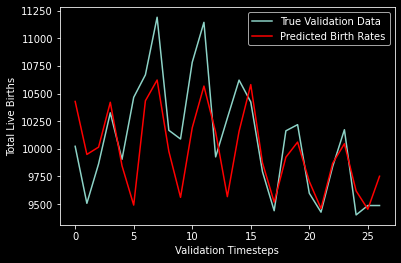

<Figure size 12000x12000 with 0 Axes>

In [65]:
preds = preds
true = true
plt.style.use('dark_background')
plt.plot(true*(y_test_max-y_test_min+ 1e-9) + y_test_min, label='True Validation Data')
plt.plot(preds*(y_test_max-y_test_min+ 1e-9) + y_test_min,color="red", label='Predicted Birth Rates')
plt.xlabel("Validation Timesteps")
plt.ylabel("Total Live Births")
plt.legend(loc="upper right")
plt.figure(figsize=(10, 10), dpi=1200)
mse = mean_squared_error(true, preds)
mae = mean_absolute_error(true, preds)
print(mse, mae)
# convert to binary classification
# statistical significance => problem space
# lagging data=> m


<AxesSubplot:xlabel='time'>

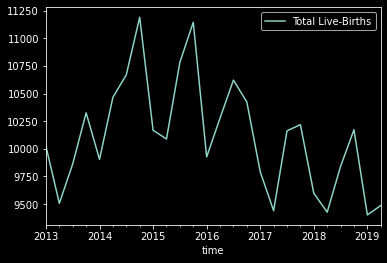

In [68]:
raw.tail(26).plot(x ="time",y= "Total Live-Births")

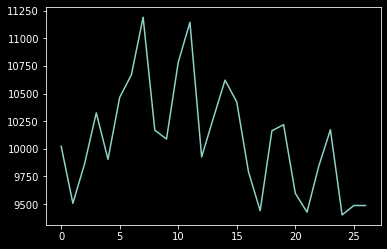

In [66]:
plt.plot(true*(y_test_max-y_test_min+ 1e-9) + y_test_min)

<AxesSubplot:xlabel='time'>

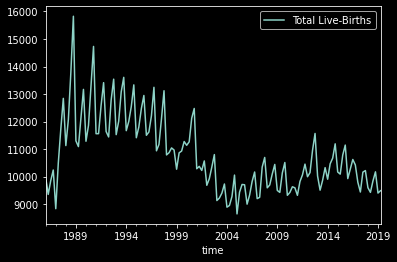

In [67]:
raw.plot(x ="time",y= "Total Live-Births")